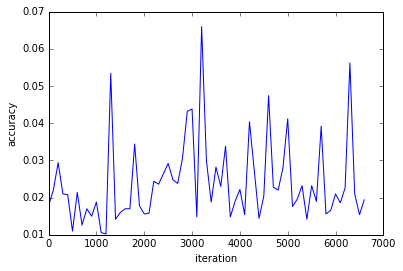

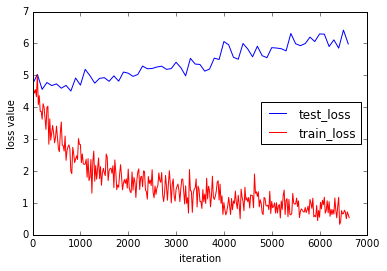

In [1]:
import io
import re
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import numpy as np
lines=[line.rstrip('\n') for line in io.open('TACC_output2.txt')]

iter_num=[]
accu_num=[]
loss_num=[]
for i in range(len(lines)):
    element=lines[i]
    #print element
    #z = re.split(" ",element)
    
    #pattern = 'Iteration'
    pattern = 'Iteration \d+, Testing net'
    z=re.findall(pattern,element)
    if len(z)!=0:
        #print lines[i+2]
        num=z[0].split(',')[0].split(' ')[1]##interation number
        iter_num.append(int(num))
        element=lines[i+1]
        z=re.findall('(\w+)\s*=\s*(\d*\.\d+)',element)
        accu_num.append(z[0][1])
        element=lines[i+2]
        z=re.findall('(\w+)\s*=\s*(\d*\.\d+)',element)
        loss_num.append(z[0][1])
        #print num,z[0][1]
train_iter_num=[]
train_loss_num=[]
for i in range(len(lines)):
    element=lines[i]
    #print element
    #z = re.split(" ",element)
    
    #pattern = 'Iteration'
    pattern = 'Iteration \d+, loss ='
    z=re.findall(pattern,element)
    if len(z)!=0:
        num=z[0].split(',')[0].split(' ')[1]##interation number
        train_iter_num.append(int(num))
        element=lines[i+1]
        z=re.findall('(\w+)\s*=\s*(\d*\.\d+)',element)
        train_loss_num.append(z[0][1])


# In[186]:

plt.plot(np.array(iter_num),np.array(accu_num))
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()
plt.plot(np.array(iter_num),np.array(loss_num),color='b',label="test_loss")
plt.plot(np.array(train_iter_num),np.array(train_loss_num),color='r',label="train_loss")
plt.legend(loc=7)
plt.xlabel('iteration')
plt.ylabel('loss value')
plt.show()
